In [222]:
library(tidyverse)
library(clusterProfiler)
library(WGCNA)
library(parallel)
library(pheatmap)
library(RColorBrewer)
library(ggplotify)
library(grid)

# Custom package
library(rutils)

In [223]:
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")
matrisome_path <- paste0(dirs$data_dir, "/matrisome/matrisome_hs_masterlist.tsv")

event_code <- list("Alive" = 0, "Dead" = 1)

In [224]:
dset_idx <- 2

In [225]:
lnames <- load(file = paste0(dirs$data_dir, "/saved_network_objects/", unified_dsets[dset_idx], "_tumor_data.RData"))
lnames <- load(file = paste0(dirs$data_dir, "/saved_network_objects/", unified_dsets[dset_idx], "_tumor_network.RData"))

In [226]:
text_size <- 11
guide_size <- 1
family <- "arial"
dpi <- 320
hm_ht <- 5
hm_wd <- 5

In [227]:
module_annot <- tibble(module_colors) %>%
    mutate(geneID = colnames(data_expr)) %>%
    column_to_rownames("geneID")

module_annot_colors <- list("module_colors" = unique(module_colors))
names(module_annot_colors[["module_colors"]]) <- unique(module_colors)

break_list <- seq(0, 0.35, by = 0.005)
pal <- colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(break_list))
# pal <- colorRampPalette(rev(brewer.pal(n = 7, name = "RdBu")))(length(break_list))

hm_breaks = c(0, 0.1, 0.2, 0.3)
hm_labels = c("0", "0.1", "0.2", "0.3")

In [228]:
tom_hm <- tom - diag(1, nrow(tom), nrow(tom))
rownames(tom_hm) <- colnames(data_expr)
colnames(tom_hm) <- colnames(data_expr)

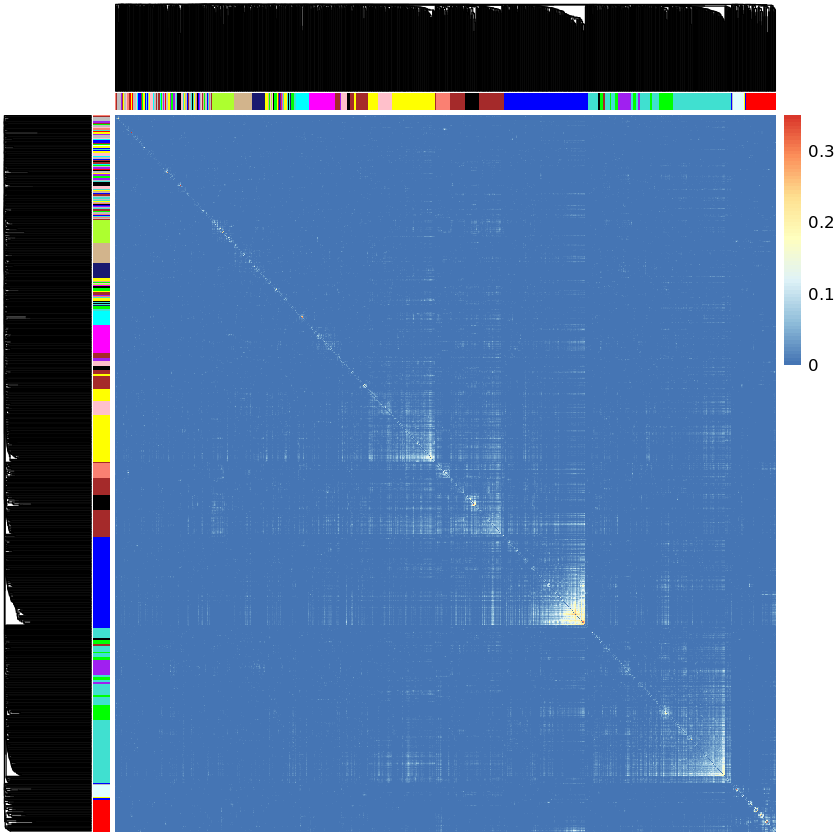

In [229]:
hm <- pheatmap(
    tom_hm,
    cluster_rows = gene_tree,
    cluster_cols = gene_tree,
    show_rownames = FALSE,
    show_colnames = FALSE,
    annotation_row = module_annot,
    annotation_names_row = FALSE,
    annotation_col = module_annot,
    annotation_colors = module_annot_colors,
    annotation_names_col = FALSE,
    annotation_legend = FALSE,
    color = pal,
    breaks = break_list,
    legend_breaks = hm_breaks,
    legend_labels = hm_labels,
#     treeheight_row = 25,
#     treeheight_col = 25,
)
hm$gtable$grobs[[1]]$gp <- gpar(lwd = 0.25)
hm$gtable$grobs[[2]]$gp <- gpar(lwd = 0.25)
# hm
# ggsave(paste0(dirs$figures_dir, "/network/", unified_dsets[dset_idx], "_TOM_heatmap.png"), as.ggplot(hm))


In [230]:
# TOMplot(
#     tom - diag(1, nrow(tom), nrow(tom)),
#     gene_tree,
#     module_colors,
#     main = "Network heatmap plot, all genes"
# )

In [231]:
# Adapted from: 
n_largest <- function(m, n) {
    res <- order(m, decreasing = TRUE)[seq_len(n) * 2]
    pos <- arrayInd(res, dim(m), useNames = TRUE)
    return(
        list(values = m[res], rows = pos[, "row"], cols = pos[, "col"])
    )
}


In [232]:
n_lg <- n_largest(tom_hm, 10)
# n_lg_rows <- n_lg$position[, "row"]
# n_lg_cols <- n_lg$position[, "col"]

In [233]:
mean(rowSums(tom_hm))

[1] 3.290075

In [234]:
n_lg

$values
 [1] 0.3847718 0.3594273 0.3414616 0.3333494 0.3138363 0.3109215 0.3069759
 [8] 0.3068363 0.3044725 0.3034967

$rows
 [1] 624  39   8  20 394 504   8 578 570 883

$cols
 [1] 674 304  39 893 688 660 304 757 578 993

In [235]:
tom_hm[n_lg$rows, n_lg$cols]

,COL4A4,FGA,FGG,IFNA2,CFC1,S100A7,FGA,C1QA,C1QC,CLEC18B
COL4A3,0.3847717579,0.0007145373,0.0002079258,1.638705e-04,0.0002769407,0.0003224899,0.0007145373,0.0016901413,0.0015602942,0.0029337296
FGG,0.0002126559,0.3594273395,0.0000000000,3.522603e-04,0.0143544009,0.0002105929,0.3594273395,0.0013765023,0.0009879807,0.0004675450
FGB,0.0015228437,0.3069759498,0.3414615700,1.933245e-04,0.0175336405,0.0001743315,0.3069759498,0.0052032855,0.0041464871,0.0016016485
MEPE,0.0001708996,0.0001435775,0.0003000753,3.333494e-01,0.0000904757,0.0124231561,0.0001435775,0.0015347067,0.0012204335,0.0003478621
CFC1B,0.0001991774,0.0163617419,0.0091142968,5.272375e-05,0.3138362677,0.0003750127,0.0163617419,0.0021002526,0.0017445172,0.0044887055
S100A7A,0.0002957584,0.0001388292,0.0001252927,1.048613e-02,0.0002464362,0.3109214886,0.0001388292,0.0006940971,0.0006463655,0.0003224646
FGB,0.0015228437,0.3069759498,0.3414615700,1.933245e-04,0.0175336405,0.0001743315,0.3069759498,0.0052032855,0.0041464871,0.0016016485
C1QC,0.0017293685,0.0052793210,0.0009879807,2.506365e-03,0.0016036476,0.0005555828,0.0052793210,0.3068363402,0.0000000000,0.0005054873
C1QB,0.0021064145,0.0057138990,0.0011062072,2.367058e-03,0.0019245669,0.0005064543,0.0057138990,0.3018169218,0.3044725463,0.0004880050
CLEC18C,0.0025904397,0.0005800669,0.0001980498,1.623210e-04,0.0026757281,0.0002966868,0.0005800669,0.0006246062,0.0005235832,0.3034967082
